## Title: Predicting Wildfires in Bejaia Using Data Mining Techniques and Classification

### Introduction:
Wild fires are among the most devastating natural disasters and cause significant material and human losses in the worst circumstances. This is what several states of the country witnessed during previous years espically in Bejaia region where the urban intersects with its dense forests. Addressing this challenge requires proactive measures that harness the power of technology and data-driven approaches.

### Purpose of this study:
The purpose of this study is to employ advanced data mining techniques and classification methodologies to develop predictive models for anticipating and managing wildfires in the Bejaia region, this is done by taking advantage of the fires data for this state which is included in our dataset **Fires_in_Bejaia.csv**, along with studying environmental factors to create accurate models that predict them

### Dataset Overview
The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria
The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)

#### Dataset columns:
**Date** : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

**Temp** : temperature noon (temperature max) in Celsius degrees

**RH** : Relative Humidity in %

**Ws** :Wind speed in km/h

**Rain**: total day in mm

**Fine Fuel Moisture Code (FFMC)** index from the FWI system

**Duff Moisture Code (DMC)** index from the FWI system

**Drought Code (DC)** index from the FWI system

**Initial Spread Index (ISI)** index from the FWI system

**Buildup Index (BUI)** index from the FWI system

**Fire Weather Index (FWI)** Index

**Classes**: two classes, namely Fire and not Fire


## ---------------------------------------------------------------------------------


### Part1: Data Preprocessing
it contians 4 phases as it is shown bellow:
#### Phase1: Data Exploration
#### Phase2: Data Cleaning
#### Phase3: Data Vizulisation
#### Phase4: Data Scaling
#### Phase 5: Model selection and prediction

### --------------------------------------------------------------------------------

#### Phase 1: Data Exploration
We will extract some useful information about the dataset as **the shape**, **datatypes of attributes**, **null values** and **statistics**

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import classification_report,accuracy_score,f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix,roc_curve
from io import StringIO
from six import StringIO
from IPython.display import Image
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Billal
#read the dataset and skip the row containing the title
data = pd.read_csv('https://raw.githubusercontent.com/BillalChaouche/DataMiningProject/main/Fires_In_Bejaia.csv')

In [ ]:

#show a first simple of data
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2013,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2013,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2013,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2013,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
# get number of rows and clomuns
data.shape

(244, 14)

In [ ]:
data.head

<bound method NDFrame.head of      day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI  \
0      1      6  2012           29   57   18    0.0  65.7   3.4   7.6  1.3   
1      2      6  2012           29   61   13    1.3  64.4   4.1   7.6  1.0   
2      3      6  2012           26   82   22   13.1  47.1   2.5   7.1  0.3   
3      4      6  2012           25   89   13    2.5  28.6   1.3   6.9  0.0   
4      5      6  2012           27   77   16    0.0  64.8   3.0  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...   ...   ...  ...   
239   26      9  2013           30   65   14    0.0  85.4  16.0  44.5  4.5   
240   27      9  2013           28   87   15    4.4  41.1   6.5     8  0.1   
241   28      9  2013           27   87   29    0.5  45.9   3.5   7.9  0.4   
242   29      9  2013           24   54   18    0.1  79.7   4.3  15.2  1.7   
243   30      9  2012           24   64   15    0.2  67.3   3.8  16.5  1.2   

      BUI  FWI     Classes    
0 

In [ ]:
# general information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [ ]:
#get the dataypes of attributes
data.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
dtype: object

* As it is shown above the datatpyes of some attributes is object which generally means String and **this need to considered in the phase of cealning data**

In [ ]:
#show some statistics of the entire dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.495902,0.501011,2012.0,2012.000,2012.00,2013.000,2013.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0


In [ ]:
#check null values
null_counts = data.isnull().sum()
null_counts

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

* The number of missing values is only 1 which means that the data is fully valued in all attributes, we can do further to display the rows that contains those null value to have better estimation

In [ ]:
# Display rows with null values in any column
rows_contain_null = data[data.isnull().any(axis=1)]
rows_contain_null

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,7,2013,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Generally, there is only one record characterized by a null value in the target attribute 'Classes'. This anomaly arises from a typographical error during the dataset collection process, wherein the data has been inadvertently shifted. Consequently, this discrepancy can be readily addressed.

In [ ]:
# check columns names
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [ ]:
#BY AMIRA
# remove spaces from column names
# identify the columns
columns_with_spaces = [col for col in data.columns if ' ' in col]
columns_with_spaces
for col in columns_with_spaces:
    data.rename(columns={col: col.strip()}, inplace=True)
data.to_csv('Fires_In_Bejaia.csv', index=False)

# verification
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [ ]:
# statisitc about the target attributes
data['Classes'].describe()

count         243
unique          8
top       fire   
freq          131
Name: Classes, dtype: object

* The attributes title are containing random white spacing and capital letter which leads to difficulty when we deal with attributes names
* We can notice from this statistical representation that the unique values of target attribute 'classes' is 8 which is not logical since we know it is a binary classes (fire, not fire) and this can be caused by the datatpye of this attributes which is string that leads to be sensitive to the syntax and spacing rather than the actual meaning and value

#### Summary of phase 1
##### Results:
  * The dataset contains 14 columns (included indexes) and 244 rows
  * The datatype of some attributes is object
  * Only one row is containing a null value on the target attributes, its position 165
  * Some statistical measures show unexpected values due to the datatpye of attributes, Like(number of unique values in binary classes is 8)
#### Notes for the next phase:
  * The attributes names should be corrected
  * The datatypes should be change to the appropriate ones
  

#### Phase 2: Data Cleaning
In this phase we will **standrize the datatpyes and names of attributes**, **remove noisy points and duplicates**, **predict null values** and **scale data**

* **first**: fix the attributes names


In [ ]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [ ]:
#make all columns name upperCases
columns_Formatted = [col.upper() for col in data.columns ]
#take the new columns names
data.columns = columns_Formatted
data.columns

Index(['DAY', 'MONTH', 'YEAR', 'TEMPERATURE', 'RH', 'WS', 'RAIN', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'CLASSES'],
      dtype='object')

* **Second**: fix the attributes datatypes

In [ ]:
# So for attributes TEMPRATURE, RH and WS are int64 but better to convert them to float64 since can be foating values

data[['TEMPERATURE', 'RH', 'WS']] = data[['TEMPERATURE','RH','WS']].astype('Float64')

In [ ]:
# for attributes DC and FWI are object but cotnain numerical values so need to convert them to float64
# data[['DC','FWI']] = data[['DC','FWI']].astype('Float64')

the above code will give an error (ValueError: could not convert string to float: '14.6 9') due to the typographical error made in this column, this problem will be addressed shortly

In [ ]:
# Find the index of the row where 'DC' value is '14.6 9'
row_pos = data[data['DC'] == '14.6 9']
row_pos

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES
165,14,7,2013,37.0,37.0,18.0,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


* Notice that there is a left shift in the values fro attributes CLASSES to DC which cause invalid value for DC and null value in attribute CLASSES

In [ ]:
#shift the values from DC to CLASSES
data.loc[165, 'DC'] = '14.6'
data.loc[165, 'ISI'] = 9
data.loc[165, 'BUI'] = 12.5
data.loc[165, 'FWI'] = '10.4'
data.loc[165, 'CLASSES'] = 'fire'

In [ ]:
data.iloc[165]

DAY              14
MONTH             7
YEAR           2013
TEMPERATURE    37.0
RH             37.0
WS             18.0
RAIN            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI             9.0
BUI            12.5
FWI            10.4
CLASSES        fire
Name: 165, dtype: object

In [ ]:
data[['DC','FWI']] = data[['DC','FWI']].astype('Float64')

In [ ]:
# for target attributes CLASSES should converted to BINARY (1,0)
# check unique values of CLASSES
data['CLASSES'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [ ]:
# we will clean those miss syntax and reduce the number of unique value to 2
data['CLASSES'] = data['CLASSES'].str.strip()
data['CLASSES'].unique()

array(['not fire', 'fire'], dtype=object)

In [ ]:
# now we can asign for 'fire' 1 and 'not fire' 0
data['CLASSES'] = data['CLASSES'].replace({'fire': 1, 'not fire': 0})


In [ ]:
# check the datatypes
data.dtypes

DAY              int64
MONTH            int64
YEAR             int64
TEMPERATURE    Float64
RH             Float64
WS             Float64
RAIN           float64
FFMC           float64
DMC            float64
DC             Float64
ISI            float64
BUI            float64
FWI            Float64
CLASSES          int64
dtype: object

* **third**: detect Duplicates and remove them

In [ ]:
#check dupplicates
print("Total Number of Duplicates:", data.duplicated().sum())
data.describe()

Total Number of Duplicates: 0


,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES
count,244.000000,244.000000,244.000000,244.0,244.0,244.0,244.000000,244.000000,244.000000,244.0,244.000000,244.000000,244.0,244.000000
mean,15.754098,7.500000,2012.495902,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.04918,0.565574
std,8.825059,1.112961,0.501011,3.633843,14.8842,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700
min,1.000000,6.000000,2012.000000,22.0,21.0,6.0,0.000000,28.600000,0.700000,6.9,0.000000,1.100000,0.0,0.000000
25%,8.000000,7.000000,2012.000000,30.0,52.0,14.0,0.000000,72.075000,5.800000,13.275,1.400000,6.000000,0.7,0.000000
50%,16.000000,7.500000,2012.000000,32.0,63.0,15.0,0.000000,83.500000,11.300000,33.1,3.500000,12.450000,4.45,1.000000
75%,23.000000,8.000000,2013.000000,35.0,73.25,17.0,0.500000,88.300000,20.750000,68.15,7.300000,22.525000,11.375,1.000000
max,31.000000,9.000000,2013.000000,42.0,90.0,29.0,16.800000,96.000000,65.900000,220.4,19.000000,68.000000,31.1,1.000000


* **fourth**: detect outilers and remove them

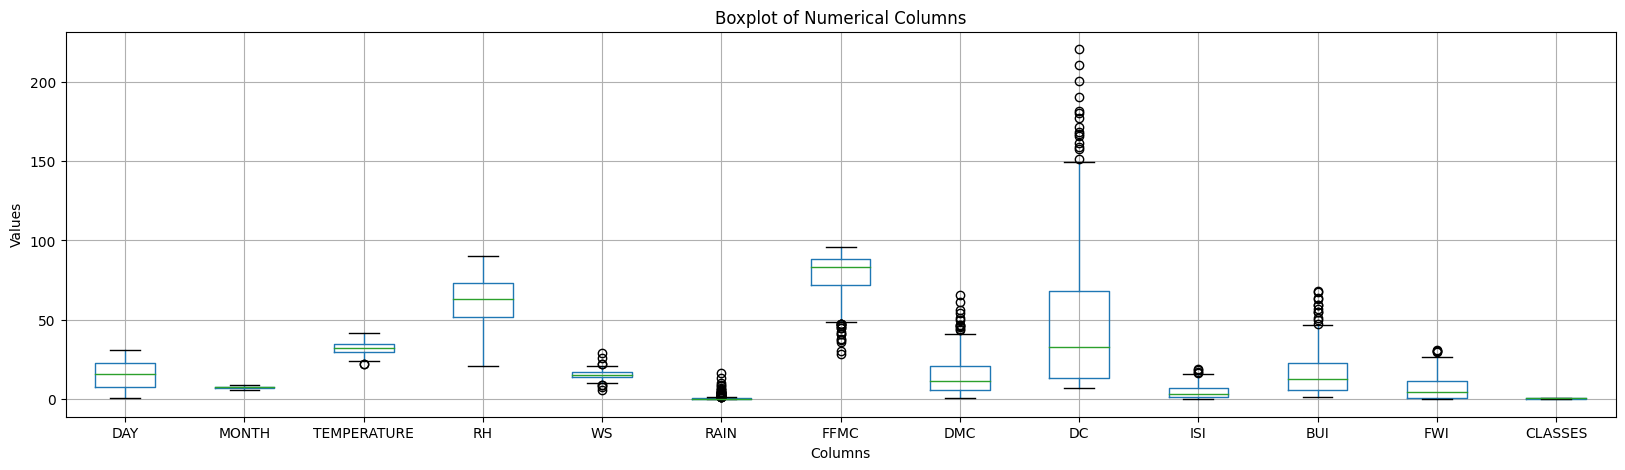

In [ ]:
# visulize the data of each column using boxplots to detect outliers
from matplotlib import pyplot as plt


plt.figure(figsize=(20, 5))  # Adjust the figure size as needed
data2 = data.drop(['YEAR'], axis=1)
data2.boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [ ]:
#calculate IQR(Interquartile Range) for more precision:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
# Check for columns and rows with outliers
columns_with_outliers = outliers.any(axis=0)
rows_with_outliers = outliers.any(axis=1)

# Print the columns with outliers
print("columns that contain outliers: \n",columns_with_outliers[columns_with_outliers].index.tolist())

# Print the rows with outliers
print("\n rows that may contain outliers: \n",data[rows_with_outliers].index.tolist())

columns that contain outliers: 
 ['TEMPERATURE', 'WS', 'RAIN', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

 rows that may contain outliers: 
 [1, 2, 3, 14, 15, 16, 38, 52, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 101, 102, 104, 105, 106, 116, 120, 121, 123, 124, 129, 134, 137, 138, 139, 140, 151, 152, 159, 160, 161, 162, 172, 173, 174, 176, 185, 187, 188, 189, 193, 199, 205, 206, 207, 208, 209, 210, 212, 213, 214, 218, 219, 232, 237, 240, 241]


Relative to the dataset's size, the presence of outliers in a portion of the rows is noteworthy. However, a definitive decision on whether to eliminate or adjust these outliers will be determined after implementing data visualization techniques and scaling methods, such as Z-score analysis.


#### Phase 3: Data Visualization

In the data visualization phase, our primary focus is on crafting a clear and insightful representation of the dataset. This involves **creating visual elements** that effectively communicate the inherent **patterns**, **relationships**, and **trends** within the data.

In [ ]:
#Oumaima
# Display all column names in the dataset
print(data.columns)


Index(['DAY', 'MONTH', 'YEAR', 'TEMPERATURE', 'RH', 'WS', 'RAIN', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'CLASSES'],
      dtype='object')


In [ ]:
# Oumaima
# Split the data into features and target
X = data.drop(columns=['CLASSES'])
y = data['CLASSES']

Understanding the distribution of the Target variable "CLASSES" :

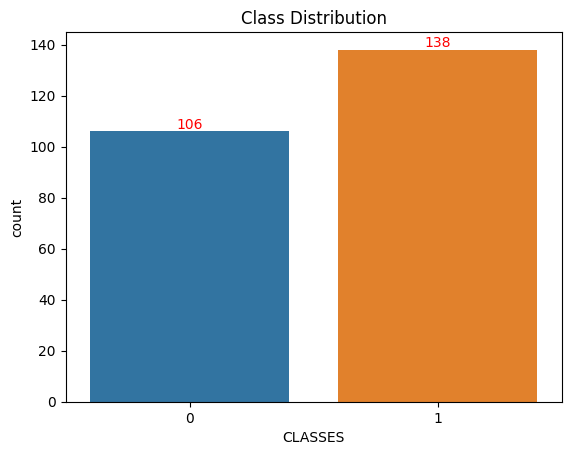

In [ ]:
# Oumaima
# Visualization 1: Bar Chart for Class Distribution
sns.countplot(x='CLASSES', data=data)

#Sarra
#Adding annotations
class_distribution = data['CLASSES'].value_counts()
for class_label, count in class_distribution.items():
    plt.text(class_label, count, str(count), ha='center', va='bottom',color='red')

plt.title('Class Distribution')
plt.show()

In [ ]:
#Sarra
#Interpretation of visu 1 :
class_0_count = class_distribution[0]
class_1_count = class_distribution[1]

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)


Class 0 count: 106
Class 1 count: 138


The bar chart shows there are more instances of fire *138* than non-fire events *106*. This difference is essential to note for creating accurate models. When training our prediction system, we need to be mindful of this imbalance to make sure our model doesn't get skewed towards predicting more fires just because there are more instances of fires in the dataset. We might need to use specific techniques to handle this imbalance and ensure our model works well for both fire and non-fire scenarios in the Bejaia .Still, due to the small size of the dataset, the diference is not really remarkable.

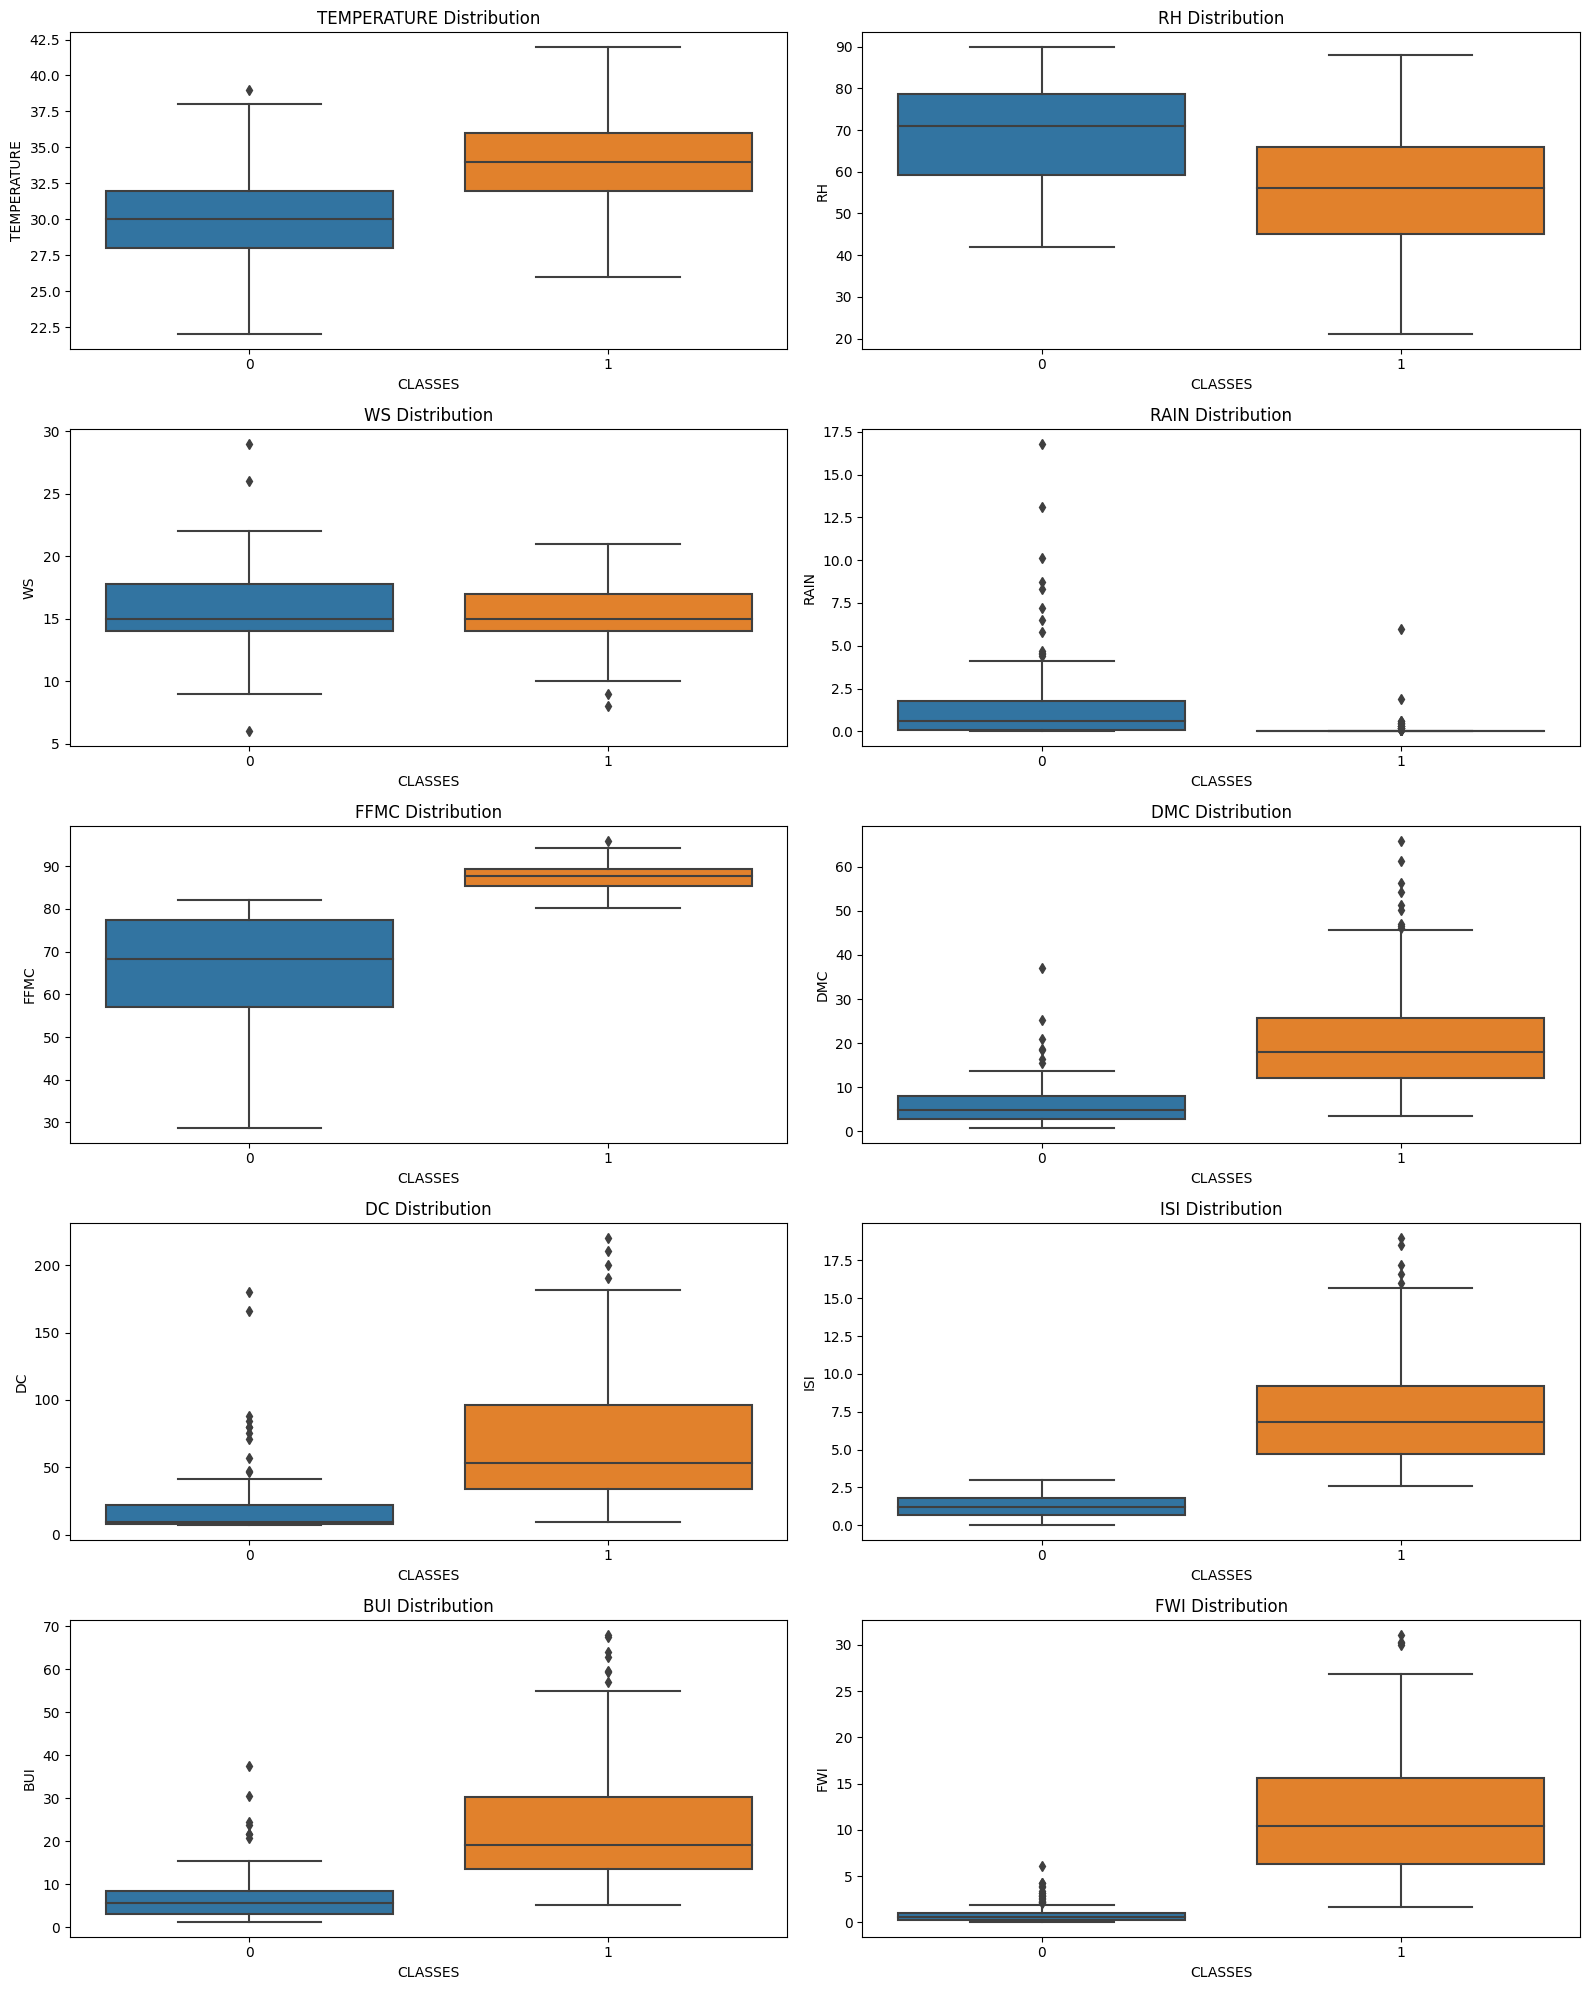

In [ ]:
# Oumaima

# Define the columns for which you want to create box plots
columns_to_plot = ['TEMPERATURE', 'RH', 'WS', 'RAIN', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))

# Loop through the columns and create box plots
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    sns.boxplot(x=y, y=column, data=X, ax=axes[row, col])
    axes[row, col].set_title(f'{column} Distribution')

# Adjust the layout for better visualization
plt.tight_layout()

# Display the box plots
plt.show()



The box plots illustrate the **distribution of weather variables** concerning fire incidents ('fire' and 'not fire').

 In the *temperature distribution (top-left)*, no outliers are observed, indicating consistent temperature values in both scenarios. The *relative humidity distribution (top-right)* also lacks outliers, suggesting stability in humidity levels regardless of fire occurrence.

  *Wind speed distribution (bottom-left)* shows two outliers in both scenarios, so we might want to look further into that.

  *In rain distribution (bottom-right)*, there are some scattered unusual values when there's no fire.In contrast, the 'fire' scenario exhibits fewer, more clustered outliers, indicating a distinct rainfall pattern during fire incidents.
  
  This gives us clues about how weather might be connected to fires in the Bejaia region.

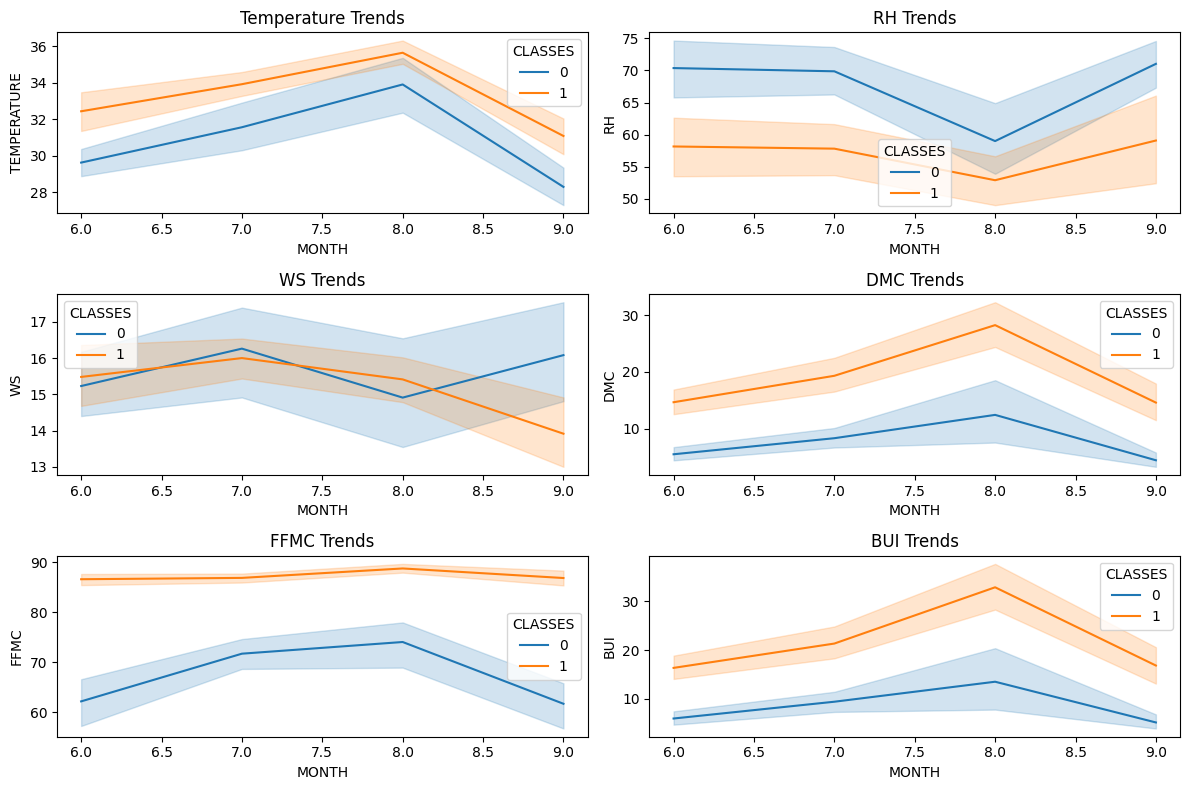

In [ ]:
# Oumaima
# Visualization 2: Line Plot for Temporal Trends
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

sns.lineplot(x='MONTH', y='TEMPERATURE', data=X, ax=axes[0, 0], hue=y)
axes[0, 0].set_title('Temperature Trends')

sns.lineplot(x='MONTH', y='RH', data=X, ax=axes[0, 1], hue=y)
axes[0, 1].set_title('RH Trends')

sns.lineplot(x='MONTH', y='WS', data=X, ax=axes[1, 0], hue=y)
axes[1, 0].set_title('WS Trends')

sns.lineplot(x='MONTH', y='DMC', data=X, ax=axes[1, 1], hue=y)
axes[1, 1].set_title('DMC Trends')

sns.lineplot(x='MONTH', y='FFMC', data=X, ax=axes[2, 0], hue=y)
axes[2, 0].set_title('FFMC Trends')

sns.lineplot(x='MONTH', y='BUI', data=X, ax=axes[2, 1], hue=y)
axes[2, 1].set_title('BUI Trends')

plt.tight_layout()
plt.show()

In [ ]:
#Sarra
#Useful precise metrics for the Interpretation
from tabulate import tabulate #for tables

# a function to extract and print min/max values for a given feature
def print_feature_range(feature_name):
    # Extract minimum and maximum values for 'not fire' scenario
    min_not_fire = X.loc[y[y == 0].index, feature_name].min()
    max_not_fire = X.loc[y[y == 0].index, feature_name].max()

    # Extract minimum and maximum values for 'fire' scenario
    min_fire = X.loc[y[y == 1].index, feature_name].min()
    max_fire = X.loc[y[y == 1].index, feature_name].max()

    table = [
        ['Not Fire', f"{min_not_fire:.2f}", f"{max_not_fire:.2f}"],
        ['Fire', f"{min_fire:.2f}", f"{max_fire:.2f}"]
    ]

    # Print the table
    print(f"{feature_name} Range:")
    print(tabulate(table, headers=['Scenario', 'Minimum', 'Maximum'], tablefmt='pretty'))
    print()

# Print ranges for Temperature, RH, WS, and DMC
print_feature_range('TEMPERATURE')
print_feature_range('RH')
print_feature_range('WS')
print_feature_range('DMC')


TEMPERATURE Range:
+----------+---------+---------+
| Scenario | Minimum | Maximum |
+----------+---------+---------+
| Not Fire |  22.00  |  39.00  |
|   Fire   |  26.00  |  42.00  |
+----------+---------+---------+

RH Range:
+----------+---------+---------+
| Scenario | Minimum | Maximum |
+----------+---------+---------+
| Not Fire |  42.00  |  90.00  |
|   Fire   |  21.00  |  88.00  |
+----------+---------+---------+

WS Range:
+----------+---------+---------+
| Scenario | Minimum | Maximum |
+----------+---------+---------+
| Not Fire |  6.00   |  29.00  |
|   Fire   |  8.00   |  21.00  |
+----------+---------+---------+

DMC Range:
+----------+---------+---------+
| Scenario | Minimum | Maximum |
+----------+---------+---------+
| Not Fire |  0.70   |  37.00  |
|   Fire   |  3.40   |  65.90  |
+----------+---------+---------+



The line plot visualizes temporal trends in environmental factors *(Temperature,Relative Humidity, Wind Speed, Duff Moisture Code)*, providing valuable insights into how these factors vary over the months (June:6 to Sept:9).

# **The subplot (lineplot) interpretations** :

**Temperature Trends (Top-Left)**:

The first subplot visualizes the trends in temperature over the months, with distinct lines representing variations in temperature for 'fire' and 'not fire' scenarios.

*'Not Fire' Scenario*:

*   The minimum temperature observed during 'not fire' instances is 22°C.
*   The maximum temperature recorded in the absence of fire is 38°C.

These values depict the range of temperature experienced during 4 months when no fire incidents occurred.

*'Fire' Scenario*:
*   -The minimum temperature during fire incidents is 26°C.

*   The maximum temperature observed during fire incidents is 42°C.

Fire scenarios tend to exhibit higher temperatures, with a broader range compared to non-fire instances. Months with elevated temperatures may correspond to increased fire risk.

By closely examining temperature fluctuations in different scenarios, we can gain insights into the environmental conditions associated with fire and non-fire instances, aiding in the development of predictive models for wildfire management in the Bejaia region.

**Wind Speed (WS) Trends (Bottom-Left)**:

The third subplot visualizes the trends in wind speed over the months, with distinct lines representing variations in WS for 'fire' and 'not fire' scenarios.

*'Not Fire' Scenario*:

*   The minimum wind speed observed during 'not fire' instances is 6.00 km/h.
*   The maximum wind speed recorded in the absence of fire is 26.00 km/h.

These values depict the range of wind speed experienced during the observed period when no fire incidents occurred.

*'Fire' Scenario*:

*   The minimum wind speed during fire incidents is 8.00 km/h.
*   The maximum wind speed observed during fire incidents is 21.00 km/h.

Fire scenarios tend to exhibit slightly higher wind speeds, indicating potentially more **dynamic environmental conditions**. Elevated wind speeds can contribute to the **rapid spread of wildfires**. Monitoring WS fluctuations provides insights into the environmental conditions conducive to fire incidents.


**Duff Moisture Code (DMC) Trends (Bottom-Right)**:

The fourth subplot visualizes the trends in Duff Moisture Code (DMC) over the months, with distinct lines representing variations in DMC for 'fire' and 'not fire' scenarios. DMC is a crucial parameter in the Fire Weather Index (FWI) system, measuring the moisture content in the shallow organic layers of the soil, commonly known as duff.

*'Not Fire' Scenario*:

*   The minimum DMC observed during 'not fire' instances is 0.70.
*   The maximum DMC recorded in the absence of fire is 37.00.

These values depict the range of DMC experienced during the observed period when no fire incidents occurred. In the context of 'not fire' scenarios, lower DMC values suggest higher moisture content in the duff layer, reducing the likelihood of fire ignition and spread.

*'Fire' Scenario*:

*   The minimum DMC during fire incidents is 3.40.
*   The maximum DMC observed during fire incidents is 65.90.

Fire scenarios tend to exhibit higher DMC values, indicating potentially **drier and more combustible** conditions in the duff layer. Elevated DMC levels are associated with an **increased risk of fire ignition and rapid spread**. Monitoring DMC fluctuations provides crucial insights into the environmental conditions conducive to fire incidents and helps in assessing the overall fire risk.

**Relative Humidity (RH) Trends (Top-Right)**:

The second subplot visualizes the trends in relative humidity over the months, with distinct lines representing variations in RH for 'fire' and 'not fire' scenarios.

*'Not Fire' Scenario*:

*   The minimum relative humidity observed during 'not fire' instances is 42.00%.
*   The maximum relative humidity recorded in the absence of fire is 90.00%.

These values depict the range of relative humidity experienced during the observed period when no fire incidents occurred.

*'Fire' Scenario*:

*   The minimum relative humidity during fire incidents is 21.00%.
*   The maximum relative humidity observed during fire incidents is 88.00%.

Fire scenarios tend to exhibit lower relative humidity, indicating potentially **drier conditions**. Lower humidity levels are associated with an increased risk of fire spread. Monitoring RH fluctuations provides insights into the environmental conditions conducive to fire incidents.


# Unsupervised Feature Selection :


# **Correlation between the independant variables** :





In [ ]:
# Oumaima
# Visualization 3: Correlation Heatmap

# Calculate the correlation matrix for the selected features in the  data
correlation_matrix = X.corr()

plt.figure(figsize=(10, 10))

# Plot the heatmap with correlation values annotated
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()



The Correlation Heatmap reveals strong positive correlations among key features in the dataset, notably DMC and BUI (0.98), DC and BUI (0.94), BUI and FWI (0.86), FWI and DMC (0.84), ISI and FWI (0.92), DMC and DC (0.88), and DMC and FWI (0.87).

 These associations highlight the interconnectedness of components within the Fire Weather Index (FWI) system, suggesting potential *redundancy*.

 Means when some data in our study are too similar, like DMC and BUI, it can confuse our analysis. To solve this, we might use techniques like PCA (feature extraction) or choose the most important features carefully(feature selection).

 This way, we can still get the main information without having too much overlap. By doing this, our model can work better and give more accurate results.


# **Variance of each independant variable** :





The provided code is aimed at visualizing the standard deviation of each variable in the dataset through the creation of a heatmap. By calculating and visualizing the standard deviation for each variable, the code offers insights into the spread or variability of the data. Features with higher standard deviation values are likely to exhibit more variability, and this visualization aids in identifying those variables that contribute significantly to the dataset's overall variance.

In [ ]:
#Oumaima

# Calculate the standard deviation for each variable in the  data
std_deviation = X.std()

plt.figure(figsize=(12, 12))

# Plot the heatmap for standard deviation
sns.heatmap(std_deviation.to_frame(), annot=True, cmap='viridis', fmt=".2f", cbar=False)
plt.title('Standard Deviation Heatmap')

# Display the heatmap
plt.show()


# Supervised feature selection


#**Correlation with Target Variable**:

In [ ]:
#Oumaima
# Calculate correlations
correlation_matrix = X.join(y).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['CLASSES']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Target Variable (CLASSES)')
plt.show()



This figure illustrates the relationships between various attributes and the target variable 'CLASSES' (0 for not fire, 1 for fire).

 We can notice a moderate positive link between temperature, relative humidity, rain, FFMC, DMC, DC, ISI, BUI, FWI, and the occurrence of fires.

  Strong positive correlations are observed with FFMC, ISI, and FWI, emphasizing their significant influence on fire events.
  
   Conversely, attributes like day, month, year, and wind speed show weaker correlations, suggesting a limited impact on fire occurrences.
   
   These insights guide the **identification of crucial factors** contributing to wildfires in Bejaia, guiding the development of our predictive model.

#**forward selection**

In [ ]:
def splitData(data):
    #split dataset in features and target variable
    columns_to_remove = ['DAY', 'MONTH', 'YEAR']  #this just because I want to test with this data
    data = data.drop(columns=columns_to_remove, errors='ignore')
    X = data.drop(columns=['CLASSES'])  # Features
    y = data['CLASSES']
    return X,y


In [ ]:
X, y = splitData(data)

In [ ]:
#feature selection : forward selection wit decision tree model
def forward_selection(X, y, model):
    sfs = SequentialFeatureSelector(model, k_features='best', forward=True , scoring='accuracy', cv=5)
    sfs.fit(X, y)
    return X.columns[list(sfs.k_feature_idx_)]

In [ ]:

# Set the parameters
rf_params = {
    'min_samples_split': 2,
    'n_estimators': 50,
    'random_state': 42
}

# Create a Random Forest model with the specified parameters
rf_model = RandomForestClassifier(**rf_params)

best_att = forward_selection(X, y, rf_model)

In [ ]:
#the result of the forward selection
best_att

In [ ]:
dataselected = data[best_att].copy()
dataselected['CLASSES'] = data['CLASSES']
dataselected

**The forward selection algorithm identified 'RH', 'FFMC', 'ISI', and 'FWI' as the best set of features for a classification problem related to fires.**


---


**Interpretation:**


*   Relative Humidity (RH): The inclusion of RH in the selected features suggests
that humidity levels have a meaningful impact on predicting the occurrence of fires. This aligns with common knowledge, as low humidity is often associated with drier conditions, which can increase the risk of fires.

*   Fine Fuel Moisture Code (FFMC): The FFMC is a numeric rating that represents the moisture content of fine fuels. Its inclusion indicates that the dryness or moisture content of fine fuels is crucial in predicting fire occurrences. High FFMC values may indicate dry conditions and increased fire risk.


*   Initial Spread Index (ISI): ISI is a measure of the potential for fire growth. Its inclusion implies that the speed at which a fire might spread initially is a significant factor in predicting fire incidents. Higher ISI values may suggest a higher potential for rapid fire spread.

*   Fire Weather Index (FWI): FWI is a composite index that integrates several weather factors to represent overall fire danger. Its inclusion suggests that the overall fire danger, considering multiple weather parameters, is crucial for accurate fire prediction. Elevated FWI values may indicate increased fire risk.









# ***Z-score normalization to handle outliers***

In [ ]:
#hamza

#Before detecting outliers, We make a view of the general statistics of our dataset using 'describe()'
data.describe()

In [ ]:
numerical_columns = ['TEMPERATURE', 'RH', 'WS', 'RAIN', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
#working on a copy of the original dataset 'data'

data_scaled = data.copy()
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler (Z-score )
scaler = StandardScaler()

# Fit and transform the selected columns
data_scaled[numerical_columns] = scaler.fit_transform(data_scaled[numerical_columns])
data_scaled.head()


In [ ]:
# Set a threshold for identifying outliers
threshold = 3

# Identify outliers based on the threshold
outliers = (abs(data_scaled[numerical_columns]) > threshold).any(axis=1)

# Display rows with outliers
data_scaled[outliers]

We notice that there are **18** rows containing outliers that exceed the threshold for Z-score

In [ ]:
#Identify the number of outliers in each column
numOfOutliers = {}
for column in numerical_columns:
    numOfOutliers[column] = (abs(data_scaled[column]) > threshold).sum()

numOfOutliers

Few outliers were identified in each column after comparing the scaled data(the original data after the Z scaling)  with the Z-score threshold. The limited number of outliers in each column is not significant and won't significantly impact our results or analysis.

# ***Feature extraction using PCA***

In [ ]:
#hamza
import pandas as pd
from sklearn.decomposition import PCA


# Drop the 'CLASSES' column
X = data.drop('CLASSES', axis=1)

# Separate the 'CLASSES' column (target variable)
y = data['CLASSES']


# Apply PCA with minimum reserved variance 98%
pca = PCA(n_components=0.98)
X2D = pca.fit_transform(X)

# Re-append the 'CLASSES' column to the reduced dataset
columns_after_pca = [f"PC_{i+1}" for i in range(X2D.shape[1])]
reduced_data = pd.DataFrame(data=X2D, columns=columns_after_pca)
reduced_data['CLASSES'] = y

# Display the first few rows of the resulting dataset
reduced_data.head()


# **Model Prediction and Evaluation**
#### Decision Trees and Random Forest Models
Wz will focus on utilizing decision trees and random forest models. Various training techniques will be employed, including:

* **Holdout Method**: Dividing the dataset into training and validation sets.
* **Cross-Validation**: Employing cross-validation to robustly assess model performance.
* **GridSearch Optimization**: Utilizing GridSearch to optimize hyperparameters for enhanced model performance.
#### Evaluation Metrics
The model's performance will be evaluated based on multiple metrics to comprehensively gauge its effectiveness:

* **Accuracy**: Determining the ratio of correctly predicted instances to the total instances.
* **F-score**: Balancing precision and recall for assessing model accuracy.
* **Precision**: Evaluating the ratio of correctly predicted positive observations to the total predicted positives.
* **Recall**: Assessing the ratio of correctly predicted positive observations to the all actual positives.

#### First: Decision Tree


**First Try**: we will use non parametric decision tree using holdout method


In [ ]:
data.columns

* For the dataset we will use the orginal data, PCA generated data, T-SNE generated data and data after features selection


In [ ]:
datasets = [data,reduced_data,dataselected]#Original Data, dataPCA, dataSelected(after features selection)
X_datasets = []
for dataset in datasets:
    X, y = splitData(dataset)
    X_datasets.append(X)

#split data into training and testing dataset from orignal dataset
X_train,X_test,Y_train,Y_test = train_test_split(X_datasets[0], y, test_size=0.3, random_state=1)
Xp_train,Xp_test,Y_train,Y_test = train_test_split(X_datasets[1], y, test_size=0.3, random_state=1)
Xs_train,Xs_test,Y_train,Y_test = train_test_split(X_datasets[2], y, test_size=0.3, random_state=1)



In [ ]:
def non_par_DTC(X_train,X_test,Y_train):
   clf = DecisionTreeClassifier()

   clf = clf.fit(X_train, Y_train)

   return clf,clf.predict(X_test)

In [ ]:
clf,y_pred = non_par_DTC(X_train,X_test,Y_train)
clfp,yp_pred = non_par_DTC(Xp_train,Xp_test,Y_train)
clfs,ys_pred = non_par_DTC(Xs_train,Xs_test,Y_train)


In [ ]:
# Model Accuracy for orgignal data
print('Model Accuracy for original data')
print("Accuracy:",metrics.accuracy_score(y_pred,Y_test))
print("Classification Report:\n", classification_report(y_pred, Y_test))
print('--------------------------------------------')

print('Model Accuracy for PCA generated data')
print("Accuracy:",metrics.accuracy_score(yp_pred,Y_test))
print("Classification Report:\n", classification_report(yp_pred, Y_test))
print('--------------------------------------------')

print('--------------------------------------------')
print('Model Accuracy for data after features selection')
print("Accuracy:",metrics.accuracy_score(ys_pred,Y_test))
print("Classification Report:\n", classification_report(ys_pred, Y_test))


In [ ]:
#Original Data
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X_datasets[0].columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

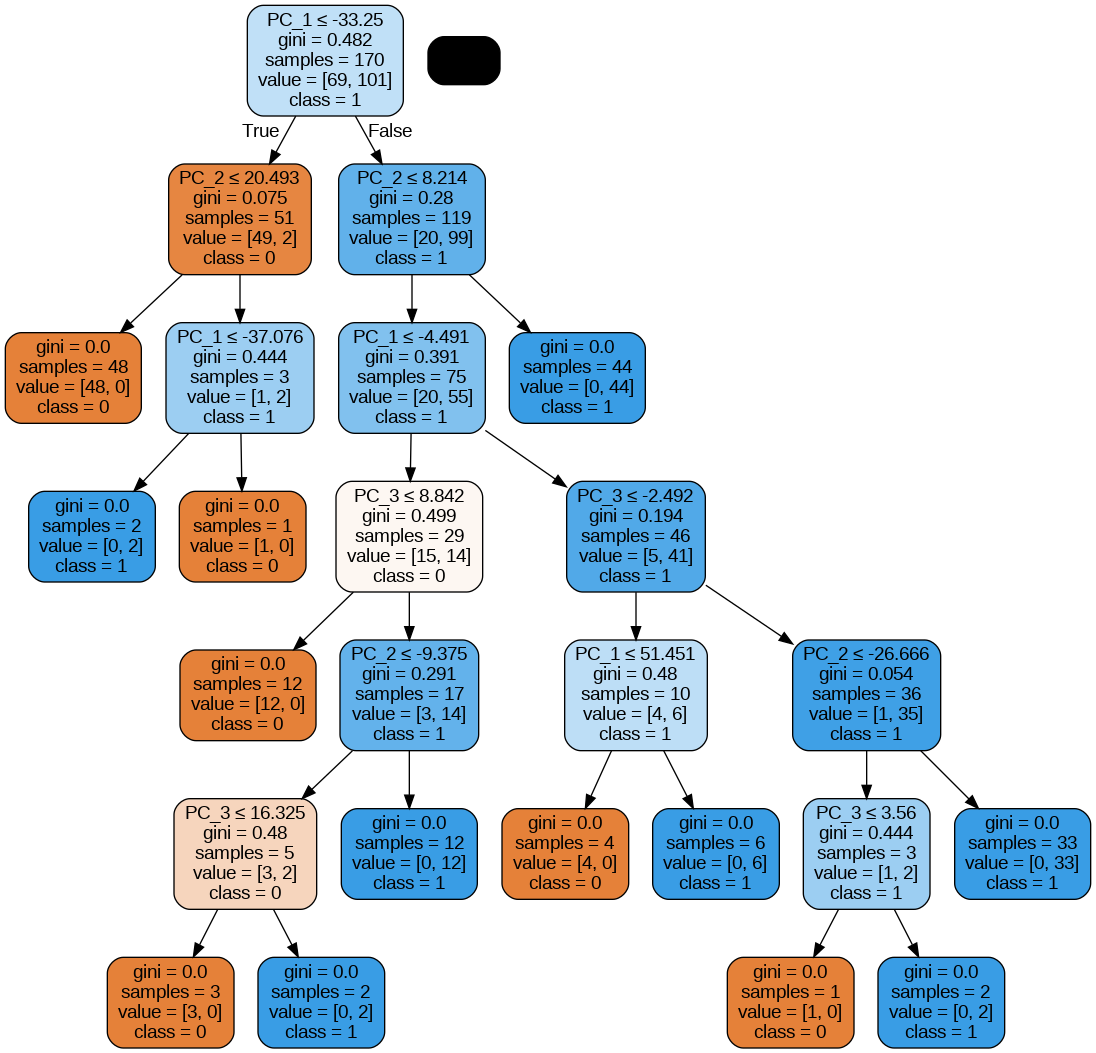

In [ ]:
#PCA generated Data
dot_data = StringIO()
export_graphviz(clfp, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X_datasets[1].columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

#### Interpretation:
* The model performs exceptionally well across both classes, achieving high precision (0.97, 1), recall (1, 0.97), and F1-score (0.99, 0.99), indicating strong predictive ability.

* With an accuracy of 98% to 99%, it shows an excellent performance in predicting the target values.

* The result of Model from the Original data seem much better than the data generated from PCA

* To delve deeper and optimize the model's performance while considering computational efficiency, we aim to identify the best parameter values applicable to the decision tree algorithm

**Second Try**: we will use parametric decision tree using holdout method and find the best prameters


* Those two functions from the lab 10 to test and visualize different hyperparameter values for a Decision Tree Classifier to obtain the best model preformance, We stick only to devie the dataset into train and test sets without validation set due to the small number of instances in our dataset

In [ ]:
def evaluate_decision_tree(hyperparameter_range, hyperparameter_name):
    train_accuracies = []
    test_accuracies = []

    for value in hyperparameter_range:
        clf_params = {hyperparameter_name: value, 'random_state': 42}
        clf = DecisionTreeClassifier(**clf_params)
        clf.fit(X_train, Y_train)
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)
        train_accuracy = accuracy_score(Y_train, train_pred)
        test_accuracy = accuracy_score(Y_test, test_pred)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    return train_accuracies, test_accuracies

In [ ]:
def plot_hyperparameter_results(hyperparameter_range, train_accuracies, test_accuracies, hyperparameter_name):
    plt.figure(figsize=(12, 6))

    # Check if the hyperparameter values are continuous or discrete
    if isinstance(hyperparameter_range[0], (int, float)):
        # Continuous hyperparameter
        plt.plot(hyperparameter_range, train_accuracies, label='Train Accuracy', marker='o', linestyle='-', markersize=5)
        plt.plot(hyperparameter_range, test_accuracies, label='Test Accuracy', marker='o', linestyle='-', markersize=5)
        plt.xticks(hyperparameter_range)  # Set x-axis ticks
        # Adding vertical lines for each tick
        for x in hyperparameter_range:
            plt.axvline(x, color='gray', linestyle='--', linewidth=0.5)
    else:
        # Discrete hyperparameter
        # Setting the width of the bars
        bar_width = 0.35

        # Calculating the positions of the bars
        index = np.arange(len(hyperparameter_range))

        # Creating bar plots
        plt.bar(index, train_accuracies, bar_width, label='Train Accuracy', alpha=0.6)
        plt.bar(index + bar_width, test_accuracies, bar_width, label='Validation Accuracy', alpha=0.6)
        plt.xticks(index + bar_width / 2, hyperparameter_range)  # Set x-axis ticks

    plt.xlabel(hyperparameter_name.capitalize())
    plt.ylabel('Accuracy')
    plt.title(f'Decision Tree Model Selection: {hyperparameter_name.capitalize()} vs Accuracy')
    plt.legend()
    plt.show()

* changing on the min_samples_leaf and max depth parameter on Decision Tree Classifier to obtain the best model accuracy


In [ ]:
hyperparameter_name_MSL = 'min_samples_leaf'
hyperparameter_range_MSL = range(1, 20)  # Adjust the range as needed
hyperparameter_name_MD = 'max_depth'
hyperparameter_range_MD = range(1, 30)

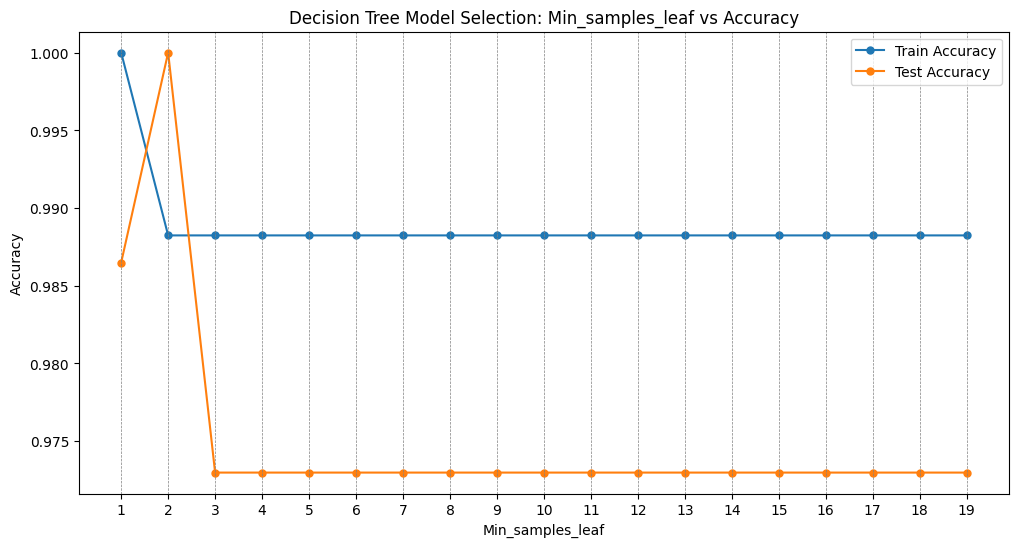

In [ ]:
train_accuracies, test_accuracies = evaluate_decision_tree(hyperparameter_range_MSL, hyperparameter_name_MSL)
plot_hyperparameter_results(hyperparameter_range_MSL, train_accuracies, test_accuracies, hyperparameter_name_MSL)

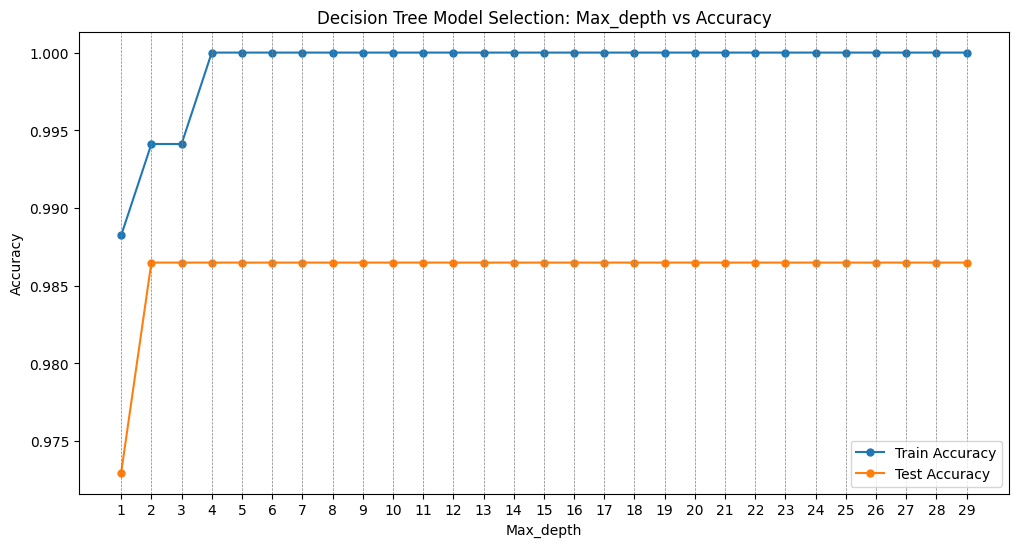

In [ ]:
train_accuracies, test_accuracies = evaluate_decision_tree(hyperparameter_range_MD, hyperparameter_name_MD)
plot_hyperparameter_results(hyperparameter_range_MD, train_accuracies, test_accuracies, hyperparameter_name_MD)

* As we can see through this graph representation the optimal value of min samples leaf is 2 which leads to very excellent accuarcy 1 and for max depth the optimal value is above or eqaul 2 wihch leads to accuracy above 0.985
* In general this model preform very good in predection the target values with different values of parameters

In [ ]:
optimal_value = 4
final_model = DecisionTreeClassifier(**{hyperparameter_name_MD: optimal_value, 'random_state': 42})
final_model.fit(X_train, Y_train)
final_test_accuracy = accuracy_score(final_model.predict(X_test), Y_test)
print("Test Accuracy of Optimal Model:", final_test_accuracy)
print("Classification Report:\n", classification_report(final_model.predict(X_test), Y_test))
print('--------------------------------------------')

Test Accuracy of Optimal Model: 0.9864864864864865
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.99        38

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

--------------------------------------------


In [ ]:
optimal_value = 2
final_model = DecisionTreeClassifier(**{hyperparameter_name_MSL: optimal_value, 'random_state': 42})
final_model.fit(X_train, Y_train)
final_test_accuracy = accuracy_score(final_model.predict(X_test), Y_test)
print("Test Accuracy of Optimal Model:", final_test_accuracy)
print("Classification Report:\n", classification_report(final_model.predict(X_test), Y_test))
print('--------------------------------------------')

Test Accuracy of Optimal Model: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        37

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

--------------------------------------------


## **model selection - Part 2**
##### using different models in order to decide which one will work better with the used dataset

#### part2.1 : working on the origninal dataset (after scaling)

In [ ]:
# Use the scaled data for our model selection
X_reduced = data_scaled.drop(columns=['CLASSES'])  # Features
y_reduced = data_scaled['CLASSES']  # Target variable

# Split the data into training, validation, and testing sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [ ]:
# Create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Perform hyperparameter tuning using GridSearchCV
best_params = {}
best_scores = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Define parameter grid for each model
    param_grid = {}
    if name == 'Logistic Regression':
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    elif name == 'KNN':
        param_grid = {'n_neighbors': [3, 5, 7, 9]}
    elif name == 'Decision Tree':
        param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

    # Perform GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    # Get the best parameters
    best_params[name] = grid_search.best_params_

    # Get the best score
    best_scores[name] = grid_search.best_score_

    # Print the best parameters and best score
    print(f"Best parameters for {name}: {best_params[name]}")
    print(f"Best score for {name}: {best_scores[name]:.4f}")

    # Make predictions on the validation set
    Y_val_pred = grid_search.predict(X_val)

    # Evaluate performance metrics on the validation set
    accuracy_val = accuracy_score(Y_val, Y_val_pred)
    f1_val = f1_score(Y_val, Y_val_pred)
    recall_val = recall_score(Y_val, Y_val_pred)
    precision_val = precision_score(Y_val, Y_val_pred)

    # Print performance metrics on the validation set
    print(f"Validation Accuracy for {name}: {accuracy_val:.4f}")
    print(f"Validation F1 Score for {name}: {f1_val:.4f}")
    print(f"Validation Recall for {name}: {recall_val:.4f}")
    print(f"Validation Precision for {name}: {precision_val:.4f}")

    # Make predictions on the test set
    Y_test_pred = grid_search.predict(X_test)

    # Evaluate performance metrics on the test set
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    f1_test = f1_score(Y_test, Y_test_pred)
    recall_test = recall_score(Y_test, Y_test_pred)
    precision_test = precision_score(Y_test, Y_test_pred)

    # Print performance metrics on the test set
    print(f"Test Accuracy for {name}: {accuracy_test:.4f}")
    print(f"Test F1 Score for {name}: {f1_test:.4f}")
    print(f"Test Recall for {name}: {recall_test:.4f}")
    print(f"Test Precision for {name}: {precision_test:.4f}")

    # Plot AUC curve for Logistic Regression model
    if name == 'Logistic Regression':
        # Get predicted probabilities for the positive class
        Y_val_pred_proba = grid_search.predict_proba(X_val)[:, 1]
        Y_test_pred_proba = grid_search.predict_proba(X_test)[:, 1]

        # Compute AUC for validation set
        auc_val = roc_auc_score(Y_val, Y_val_pred_proba)

        # Compute AUC for test set
        auc_test = roc_auc_score(Y_test, Y_test_pred_proba)

        # Plot AUC curves
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        fpr_val, tpr_val, _ = roc_curve(Y_val, Y_val_pred_proba)
        plt.plot(fpr_val, tpr_val, label=f'AUC = {auc_val:.4f}', color='orange')
        plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
        plt.title(f'AUC Curve - {name} (Validation)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')

        plt.subplot(1, 2, 2)
        fpr_test, tpr_test, _ = roc_curve(Y_test, Y_test_pred_proba)
        plt.plot(fpr_test, tpr_test, label=f'AUC = {auc_test:.4f}', color='green')
        plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
        plt.title(f'AUC Curve - {name} (Test)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')

        plt.tight_layout()
        plt.show()

    # Plot confusion matrix that provides a detailed breakdown of the model's predictions and actual outcomes for the test set
    cm_test = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fire', 'Fire'], yticklabels=['Not Fire', 'Fire'])
    plt.title(f'Confusion Matrix - {name} (Test)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### **intrepretation of the results:**

### Logistic Regression:
#### Interpretation:
- The logistic regression model exhibits robust performance with a high cross-validation score .
- Cross-validation helps mitigate overfitting concerns, providing a reliable estimate of the model's generalization ability.
- The high precision indicates that when the model predicts the presence of fire, it is correct 96.15% of the time.
- The recall  indicates that the model correctly identifies 92.59% of the actual instances of fire.
- The F1 score, which balances precision and recall, is high at 94.34%.
- The model can be considered suitable for predicting fires in Bejaia, providing a balanced trade-off between precision and recall.


### KNN:
#### Interpretation:
- KNN provides a decent performance but appears to lag behind logistic regression in terms of cross-validated accuracy.
- While cross-validation helps mitigate overfitting, it suggests that the model may not generalize as well as logistic regression.
- The accuracy, F1 score, recall, and precision are reasonable but not as high as logistic regression.

### Decision Tree:
#### Interpretation:
- The Decision Tree exhibits exceptional performance on both the training set and cross-validation, achieving perfect scores.
- However, the perfect scores might indicate potential overfitting, capturing noise or specific patterns that don't generalize well.
- While the model might perform well on the training data, caution is needed to ensure generalization to new, unseen data.

### Random Forest:

#### Interpretation:
Random Forest, like the Decision Tree, achieves perfect scores in both training and cross-validation.
The complexity introduced by the ensemble approach may contribute to overfitting concerns.
Further investigation is needed to ensure that the model generalizes well to new data, especially considering the small dataset size.



#### **perfect scores Explanation in the two last models and other considerations:**
##### Complexity of Models:
Decision Tree and Random Forest models, by design, can capture intricate patterns in the training data.
Decision Trees, in particular, are prone to fitting noise and outliers in small datasets. They can create branches and leaves to perfectly fit the training data, even capturing random fluctuations that do not generalize well to new data.
##### Memorization of Training Data:
With a very small dataset, the models might memorize the training instances rather than learning the underlying patterns.
Decision Trees, and subsequently Random Forests, can split the data to the extent that each training instance ends up in a separate leaf node, essentially memorizing the training set.

##### Cross-Validation Impact:
Cross-validation helps mitigate overfitting by assessing the model's performance on multiple folds of the data.However, with a small dataset, the models might still find subsets of the data that perfectly fit the training instances in each fold.

##### Hyperparameter Tuning:
The grid search during hyperparameter tuning might inadvertently lead to configurations that favor overfitting.
For instance, using no maximum depth for the Decision Tree and a relatively high number of estimators in the Random Forest could contribute to more complex models.

#### **general notes and considerations:**
- The small dataset size (244 samples) may impact the reliability of model performance estimates. While cross-validation helps, it's crucial to validate models on larger, independent datasets to assess their true generalization ability.
- The study's impact on predicting fires in Bejaia could be significant if the models generalize well to new, unseen data. However, given the potential overfitting concerns, it's crucial to validate the models on additional data from Bejaia or similar regions to ensure their reliability.

#### part 2.2 : working on the resulted dataset from PCA

In [ ]:
# Use the scaled data for our model selection
X_reduced = reduced_data.drop(columns=['CLASSES'])  # Features
y_reduced = reduced_data['CLASSES']  # Target variable

# Split the data into training, validation, and testing sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [ ]:
# Create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Perform hyperparameter tuning using GridSearchCV
best_params = {}
best_scores = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Define parameter grid for each model
    param_grid = {}
    if name == 'Logistic Regression':
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    elif name == 'KNN':
        param_grid = {'n_neighbors': [3, 5, 7, 9]}
    elif name == 'Decision Tree':
        param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

    # Perform GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    # Get the best parameters
    best_params[name] = grid_search.best_params_

    # Get the best score
    best_scores[name] = grid_search.best_score_

    # Print the best parameters and best score
    print(f"Best parameters for {name}: {best_params[name]}")
    print(f"Best score for {name}: {best_scores[name]:.4f}")

    # Make predictions on the validation set
    Y_val_pred = grid_search.predict(X_val)

    # Evaluate performance metrics on the validation set
    accuracy_val = accuracy_score(Y_val, Y_val_pred)
    f1_val = f1_score(Y_val, Y_val_pred)
    recall_val = recall_score(Y_val, Y_val_pred)
    precision_val = precision_score(Y_val, Y_val_pred)

    # Print performance metrics on the validation set
    print(f"Validation Accuracy for {name}: {accuracy_val:.4f}")
    print(f"Validation F1 Score for {name}: {f1_val:.4f}")
    print(f"Validation Recall for {name}: {recall_val:.4f}")
    print(f"Validation Precision for {name}: {precision_val:.4f}")

    # Make predictions on the test set
    Y_test_pred = grid_search.predict(X_test)

    # Evaluate performance metrics on the test set
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    f1_test = f1_score(Y_test, Y_test_pred)
    recall_test = recall_score(Y_test, Y_test_pred)
    precision_test = precision_score(Y_test, Y_test_pred)

    # Print performance metrics on the test set
    print(f"Test Accuracy for {name}: {accuracy_test:.4f}")
    print(f"Test F1 Score for {name}: {f1_test:.4f}")
    print(f"Test Recall for {name}: {recall_test:.4f}")
    print(f"Test Precision for {name}: {precision_test:.4f}")

    # Plot AUC curve for Logistic Regression model
    if name == 'Logistic Regression':
        # Get predicted probabilities for the positive class
        Y_val_pred_proba = grid_search.predict_proba(X_val)[:, 1]
        Y_test_pred_proba = grid_search.predict_proba(X_test)[:, 1]

        # Compute AUC for validation set
        auc_val = roc_auc_score(Y_val, Y_val_pred_proba)

        # Compute AUC for test set
        auc_test = roc_auc_score(Y_test, Y_test_pred_proba)

        # Plot AUC curves
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        fpr_val, tpr_val, _ = roc_curve(Y_val, Y_val_pred_proba)
        plt.plot(fpr_val, tpr_val, label=f'AUC = {auc_val:.4f}', color='orange')
        plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
        plt.title(f'AUC Curve - {name} (Validation)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')

        plt.subplot(1, 2, 2)
        fpr_test, tpr_test, _ = roc_curve(Y_test, Y_test_pred_proba)
        plt.plot(fpr_test, tpr_test, label=f'AUC = {auc_test:.4f}', color='green')
        plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
        plt.title(f'AUC Curve - {name} (Test)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')

        plt.tight_layout()
        plt.show()

    # Plot confusion matrix that provides a detailed breakdown of the model's predictions and actual outcomes for the test set
    cm_test = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fire', 'Fire'], yticklabels=['Not Fire', 'Fire'])
    plt.title(f'Confusion Matrix - {name} (Test)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

#### **intrepretation of the results:**

### Logistic Regression:
Best Parameters: {'C': 1}
Best Score: 0.9588
Validation Accuracy: 0.9730
Validation F1 Score: 0.9804
Validation Recall: 0.9615
Validation Precision: 1.0000
Test Accuracy: 0.9459
Test F1 Score: 0.9524
Test Recall: 0.9524
Test Precision: 0.9524

#### Interpretation:

- Logistic Regression continues to perform well with high accuracy, F1 score, recall, and precision.
- The feature extraction using PCA did not negatively impact the model's performance, and in fact, the recall and precision have improved compared to the previous dataset.
- It maintains a balance between precision and recall, making it suitable for predicting fires.


### KNN:
Best Parameters: {'n_neighbors': 3}
Best Score: 0.9176
Validation Accuracy: 0.8919
Validation F1 Score: 0.9259
Validation Recall: 0.9615
Validation Precision: 0.8929
Test Accuracy: 0.9459
Test F1 Score: 0.9545
Test Recall: 1.0000
Test Precision: 0.9130

#### Interpretation:
- KNN shows solid performance with improved recall compared to the previous dataset.
- The model slightly improves its precision on the validation set but maintains a good balance between precision and recall
- Feature extraction with PCA seems to have a positive impact on KNN's ability to correctly identify instances of fire.

### Decision Tree:
Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Best Score: 0.8412
Validation Accuracy: 0.8919
Validation F1 Score: 0.9200
Validation Recall: 0.8846
Validation Precision: 0.9583
Test Accuracy: 0.8378
Test F1 Score: 0.8696
Test Recall: 0.9524
Test Precision: 0.8000

#### Interpretation:
- Decision Tree performance remains reasonable post-PCA, with improvements in precision on the validation set.
- However, the model still exhibits signs of overfitting, as seen in the gap between training and validation scores.

### Random Forest:
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9176
Validation Accuracy: 0.8649
Validation F1 Score: 0.9057
Validation Recall: 0.9231
Validation Precision: 0.8889
Test Accuracy: 0.8378
Test F1 Score: 0.8696
Test Recall: 0.9524
Test Precision: 0.8000

#### Interpretation:
- Random Forest maintains competitive performance post-PCA, but there is a slight decrease in accuracy and precision.
- Similar to Decision Tree, caution is needed to address potential overfitting.




#### **Overall Insights:**
- Logistic Regression consistently performs well in both datasets, demonstrating its robustness.
KNN shows improvements in precision after PCA, making it a more balanced classifier.
- Decision Tree and Random Forest, while performing well in the initial dataset, show signs of overfitting in the PCA-processed dataset.

- In summary, after applying PCA, the models generally maintain good predictive performance, but overfitting remains a concern for tree-based models. Logistic Regression, with its balanced performance, seems to be a reliable choice in both scenarios.

## **Final decision and conclusion**
Considering the overfitting concerns in the models trained on scaled data, the models trained on the reduced data after PCA appear to offer more balanced and reliable performance. The impact of PCA on Logistic Regression and KNN is positive, with improved or comparable metrics, while mitigating overfitting concerns observed in Decision Tree and Random Forest. The reduced data, after PCA, seems to provide more stable and generalizable models, making it a preferable choice for predicting fires in Bejaia.

However from another point of view,given the mixed results for Decision Tree and Random Forest after applying PCA, and considering the overfitting concerns persisting in these models, the choice becomes less straightforward. The models trained on the scaled data, despite the overfitting issues, demonstrated exceptional performance.
Therefore, a cautious approach is recommended. Depending on the specific requirements and goals, it may be worthwhile to consider both sets of models. Logistic Regression and KNN from the reduced data after PCA seem promising, especially with the improved recall and precision. However, continued validation on larger, independent datasets is crucial for ensuring the reliability of these models in real-world scenarios.